In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sounddevice
!pip install scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Розовый шум

In [25]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)

In [26]:
# генерим белый шум
white_noise = np.random.normal(loc = 0, scale = 1, size = num_samples)

# генерим розовый шум
fft = np.fft.rfft(white_noise)
freqs = np.fft.rfftfreq(num_samples, d=1/sample_rate)
amps = np.abs(fft)
coefs = np.zeros(freqs.shape)
coefs[1:] = 1 / np.sqrt(freqs[1:])
pink_amps = amps * coefs
pink_fft = pink_amps * np.exp(1j * np.angle(fft))
pink_noise = np.real(np.fft.irfft(pink_fft))

print(pink_noise)


[-0.07889871  0.01064725 -0.08936553 ... -0.03804484 -0.0277818
 -0.03764735]


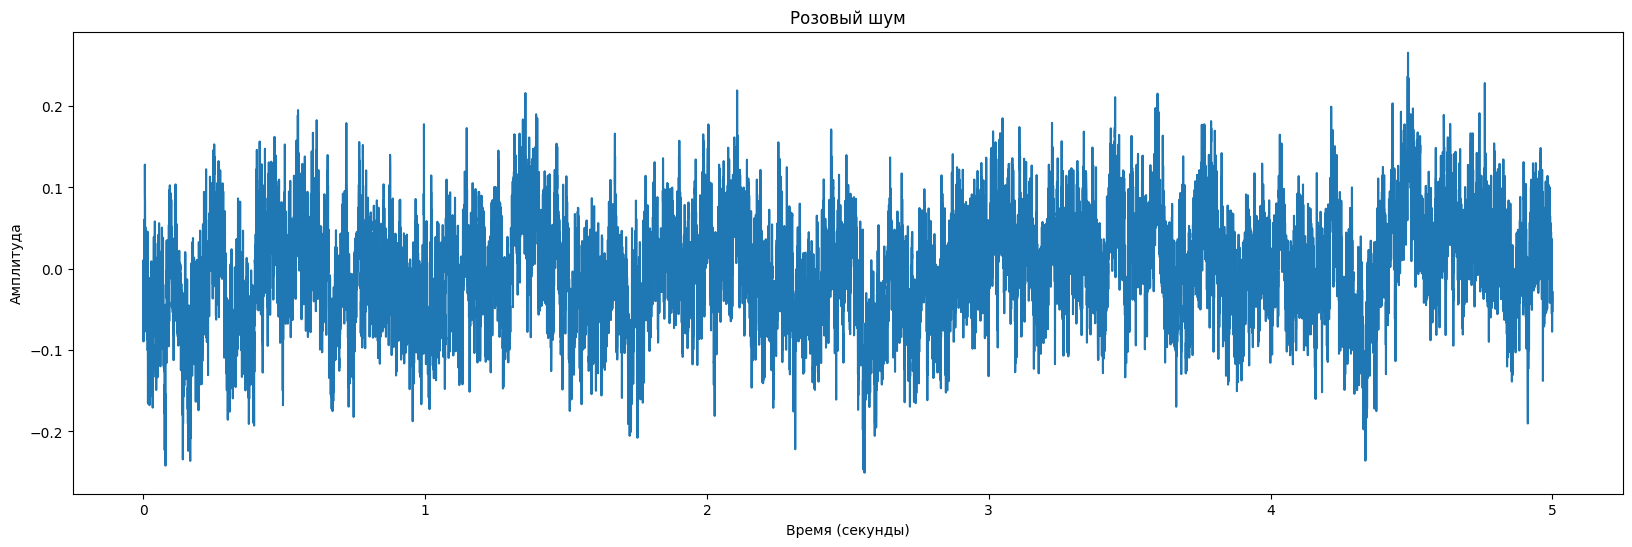

In [27]:
time_axis = np.linspace(0, duration, len(pink_noise)) 

plt.figure(figsize=(20, 6))  

plt.plot(time_axis, pink_noise)

plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

2) Черный шум

In [28]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

num_samples = int(duration * freq1)



black_noise = np.zeros(num_samples)   
time_axis = np.arange(num_samples) / sample_rate   



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 


black_noise = white_noise + eq

black_noise /= np.max(np.abs(black_noise))

                                         

1.380649e-23
6.62607015e-34
299792458.0


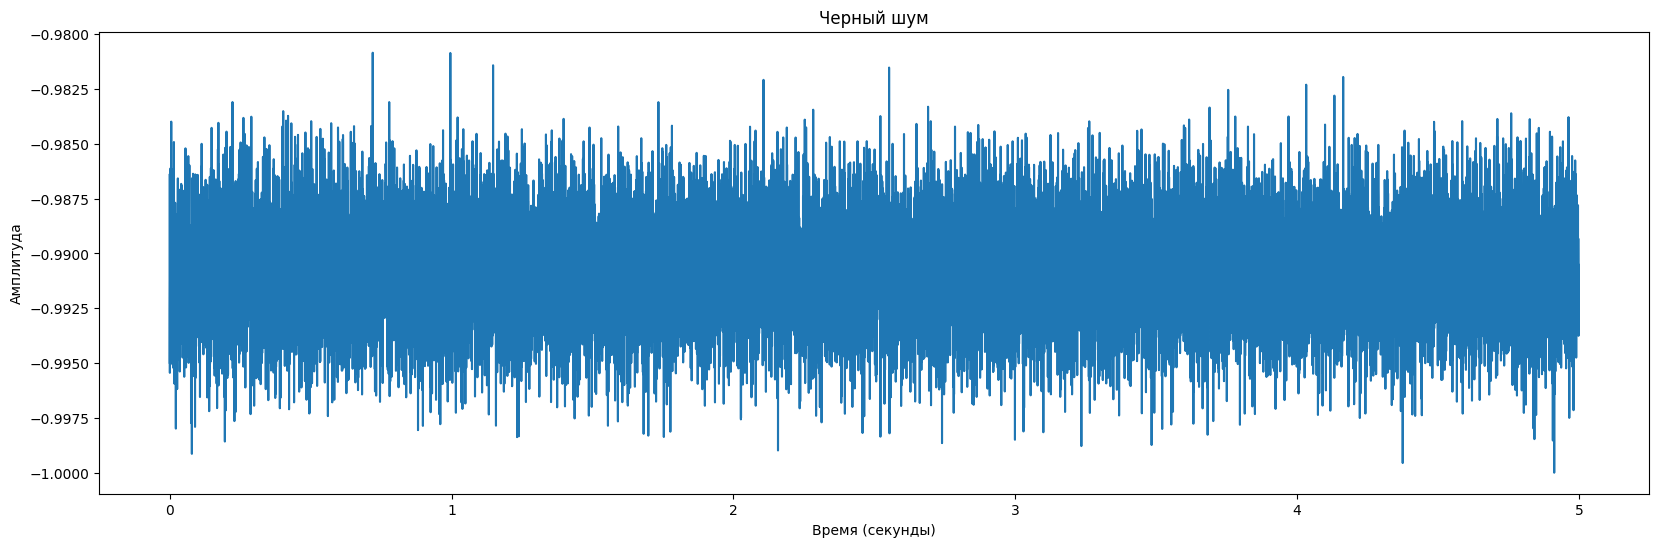

In [29]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

3. Генерация сигнала

In [32]:
num_points = duration*sample_rate 

time_points = np.linspace(0, duration, num_points)

values = 2*np.cos(4 * time_points*np.pi)

values_noise = values + black_noise 

/tmp/ipykernel_38383/1934456702.py:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


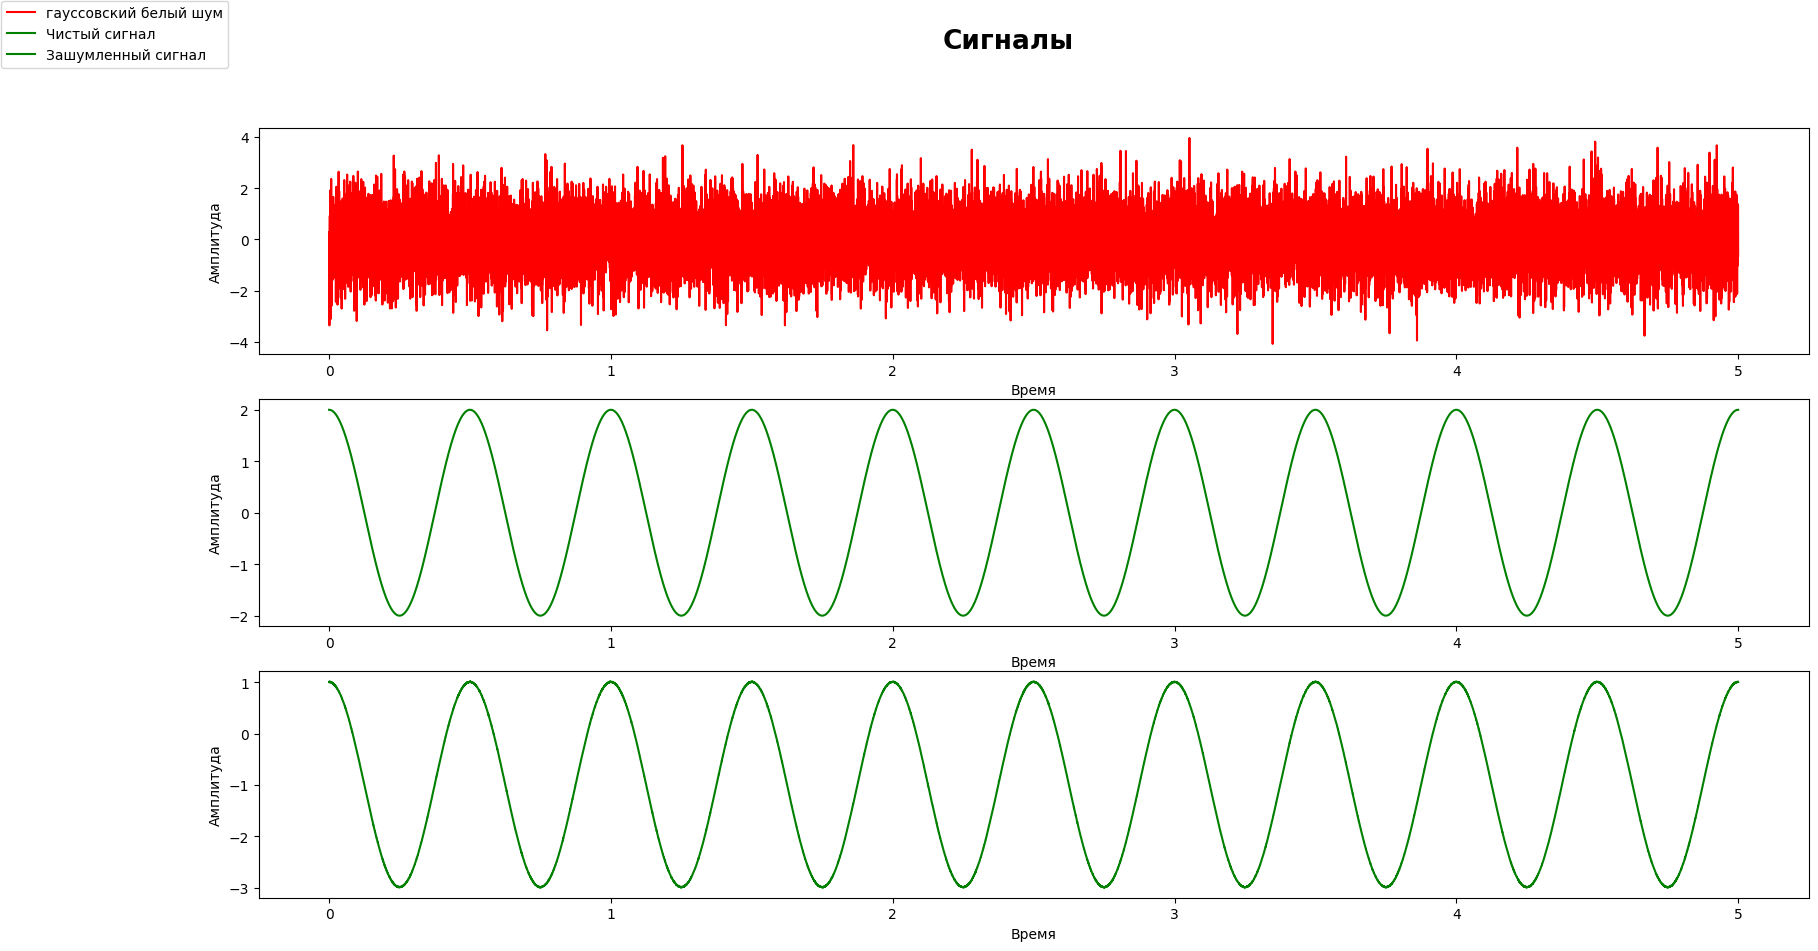

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))

fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

